# Introducción a señales
Objetivo:
 - Generar señales de distinto tipo/forma
 - Graficarlas

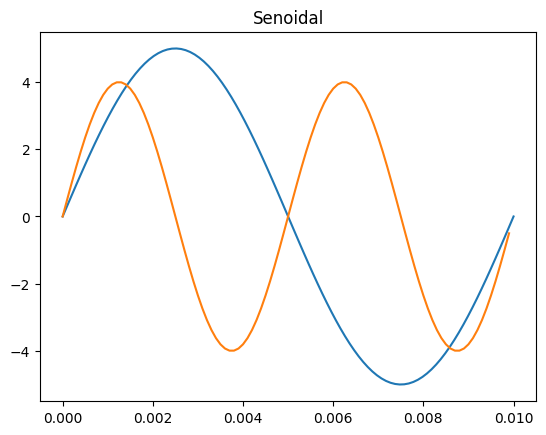

In [49]:
import numpy as np
import matplotlib.pyplot as plt

########### Parámetros Iniciales ###########
Fs = 10000  # Frecuencia de muestreo (Hz)
N = 100      # Número de muestras
t2 = np.arange(0,N/Fs,1/Fs)

t = np.linspace(0,N/Fs,num=N) #Crea una variable de tiempo desde 0, con intervalos de ts=1/Fs
f1 = 100   # Hz
A1 = 5
signal_1 = A1 * np.sin(2*np.pi*f1*t)


f2 = 200   # Hz
A2 = 4



signal_2 = A2 * np.sin(2*np.pi*f2*t2)

plt.title("Senoidal")
plt.plot(t,signal_1)
plt.plot(t2,signal_2)


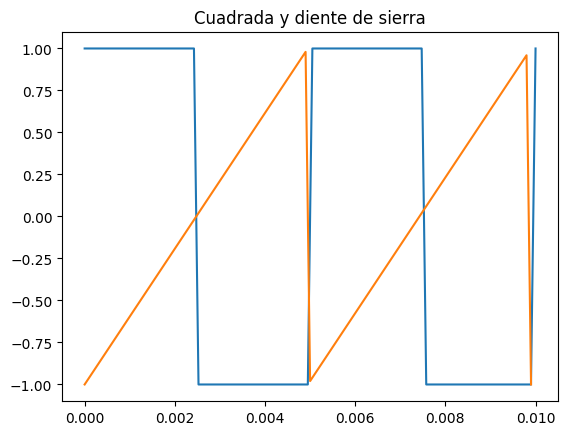

In [50]:
import scipy.signal as sig

cuadrada = sig.square(2*np.pi*f2*t)

d_sierra = sig.sawtooth(2*np.pi*f2*t)

plt.title("Cuadrada y diente de sierra")
plt.plot(t,cuadrada)
plt.plot(t2,d_sierra)

## Muestreo y aliasing

### El aliasing es un efecto que hace que una señal aparezca con una frecuencia que no es la esperada.

Este efecto ocurre cuando se muestrea la señal a una frecuencia de muestreo Fs que no cumple el teorema de Nyquist, que dice que la misma debe ser mayor al doble del ancho de banda de la señal que se está muestreando.

### Para pasar de dominio de tiempo a frecuencia, utilizo la transformada de Fourier en tiempo discreto.
El algoritmo para calcularla es la FFT (Fast Fourier Transform)
## Funciones usadas:
- fft -> calcula la transformada en sí
- abs -> fft da resultado complejo, y nos interesa el módulo.
- fftshift -> desplaza el valor 0 de la respuesta en frecuencia hacia el centro del espectro.
- fftfreq -> devuelve las frecuencias para el eje "x" (el de frecuencias)

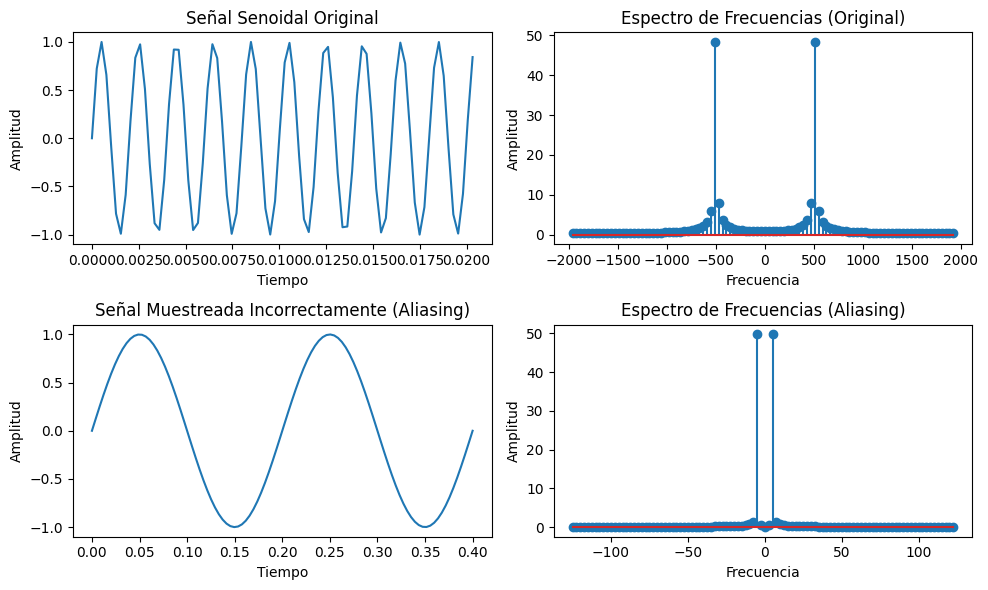

In [51]:
from scipy.fft import fft

# Parámetros de la señal
fs = 500  # Frecuencia de la señal
f_muestreo_correcta = 7.8546 * fs  # Frecuencia de muestreo correcta (más del doble de la frecuencia de la señal)

# Vector de tiempo
t = np.linspace(0,N/f_muestreo_correcta,num=N)

# Señal senoidal original
senal_original = np.sin(2 * np.pi * fs * t)

# Muestrear la señal con una frecuencia de muestreo que no cumple con el teorema de Nyquist
f_muestreo_erronea = fs / 2  # frecuencia de muestreo menor que el doble de la frecuencia de la señal
t_erronea = np.linspace(0,N/f_muestreo_erronea,num=N)
senal_erronea = np.sin(2 * np.pi * fs * t_erronea)

# Calcular la transformada de Fourier de ambas señales
espectro_original = fft(senal_original)
espectro_erronea = fft(senal_erronea)

# Visualizar las señales y sus espectros
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Señal original
axs[0, 0].plot(t[0:80], senal_original[0:80])
axs[0, 0].set_title('Señal Senoidal Original')
axs[0, 0].set_xlabel('Tiempo')
axs[0, 0].set_ylabel('Amplitud')

# Espectro de la señal original
axs[0, 1].stem(np.fft.fftshift(np.fft.fftfreq(len(t), 1/f_muestreo_correcta)), np.fft.fftshift(np.abs(espectro_original)))
axs[0, 1].set_title('Espectro de Frecuencias (Original)')
axs[0, 1].set_xlabel('Frecuencia')
axs[0, 1].set_ylabel('Amplitud')

# Señal muestreada erróneamente (con aliasing)
axs[1, 0].plot(t_erronea, senal_erronea)
axs[1, 0].set_title('Señal Muestreada Incorrectamente (Aliasing)')
axs[1, 0].set_xlabel('Tiempo')
axs[1, 0].set_ylabel('Amplitud')

# Espectro de la señal con aliasing
axs[1, 1].stem(np.fft.fftshift(np.fft.fftfreq(len(t_erronea), 1/f_muestreo_erronea)), np.fft.fftshift(np.abs(espectro_erronea)))
axs[1, 1].set_title('Espectro de Frecuencias (Aliasing)')
axs[1, 1].set_xlabel('Frecuencia')
axs[1, 1].set_ylabel('Amplitud')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Teorema de convolucion

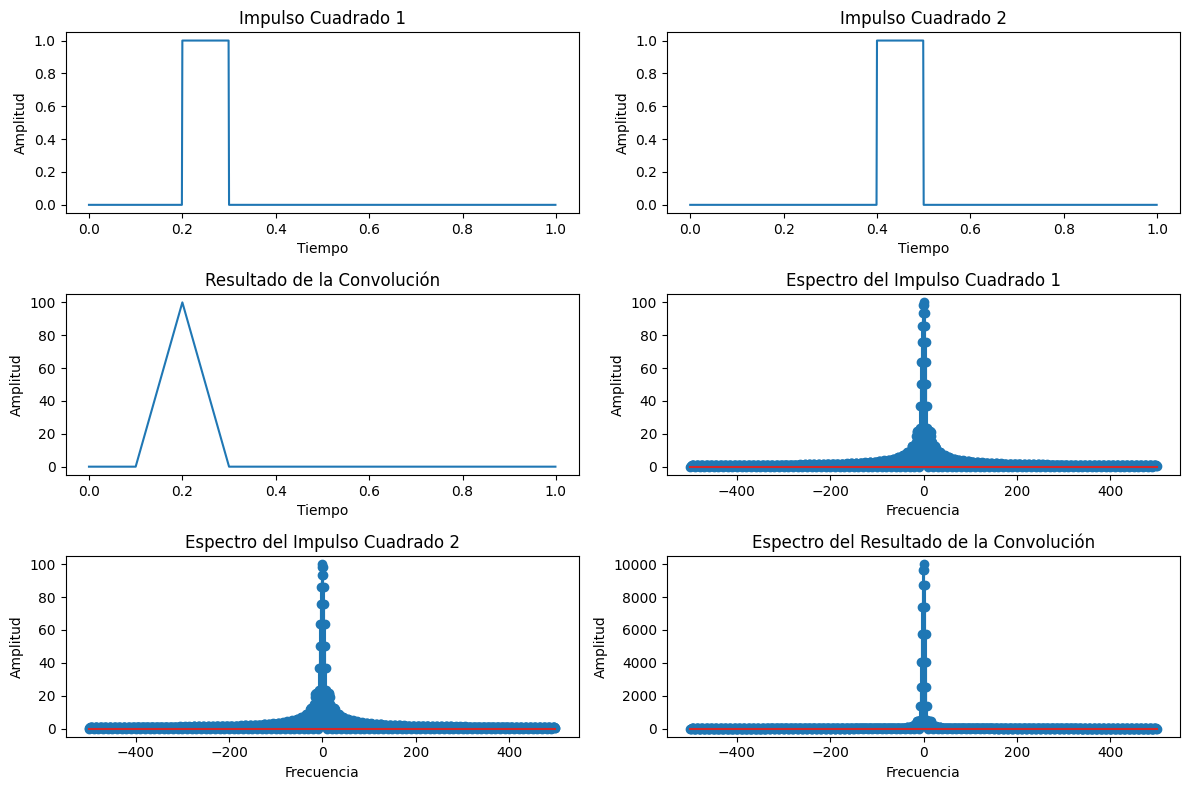

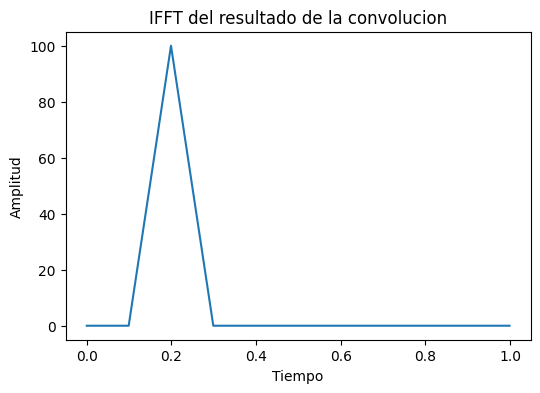

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.fft import fft, fftshift, fftfreq, ifft

# Parámetros de los impulsos cuadrados
t = np.linspace(0, 1, 1000, endpoint=False)  # Vector de tiempo
impulso1 = np.zeros_like(t)
impulso1[200:300] = 1  # Impulso cuadrado 1
impulso2 = np.zeros_like(t)
impulso2[400:500] = 1  # Impulso cuadrado 2

# Realizar la convolución de los impulsos
resultado_conv = np.convolve(impulso1, impulso2, mode='same')

# Calcular los espectros de los impulsos y del resultado de la convolución
espectro_impulso1 = (fft(impulso1))
espectro_impulso2 = (fft(impulso2))
espectro_conv = espectro_impulso1 * espectro_impulso2
# espectro_conv = fftshift(fft(resultado_conv))

# Graficar en el dominio del tiempo
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(t, impulso1)
plt.title('Impulso Cuadrado 1')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 2, 2)
plt.plot(t, impulso2)
plt.title('Impulso Cuadrado 2')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(3, 2, 3)
plt.plot(np.arange(len(resultado_conv))/1000, resultado_conv)
plt.title('Resultado de la Convolución')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Graficar en el dominio de la frecuencia
freqs = fftshift(fftfreq(len(t), 1/1000))

plt.subplot(3, 2, 4)
plt.stem(freqs, np.abs(fftshift(espectro_impulso1)))
plt.title('Espectro del Impulso Cuadrado 1')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(3, 2, 5)
plt.stem(freqs, np.abs(fftshift(espectro_impulso2)))
plt.title('Espectro del Impulso Cuadrado 2')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

plt.subplot(3, 2, 6)
plt.stem(freqs, np.abs(fftshift(espectro_conv)))
plt.title('Espectro del Resultado de la Convolución')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

senal_reconstruida = ifft(espectro_conv)

# Graficar la señal reconstruida en el dominio del tiempo
plt.figure(figsize=(6, 4))
plt.plot(t, np.abs(fftshift(senal_reconstruida)))
plt.title('IFFT del resultado de la convolucion')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()


## Ejemplo: Modulacion AM

Text(0.5, 1.0, 'AM [time]')

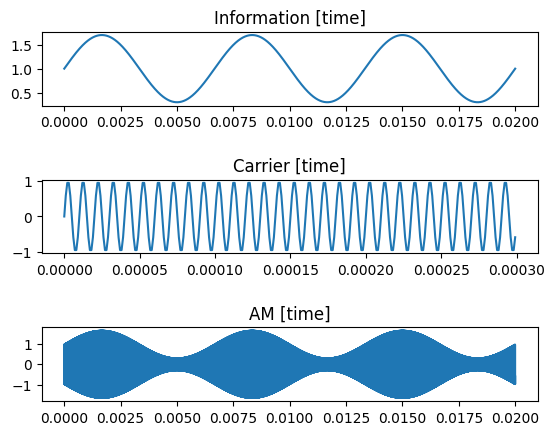

In [53]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft, fftshift

Fs = 150 # Frecuencia de modulante
Fc = 1e5 # Frecuencia de carrier
Ss = 10  # Sobre sampleo Fs = Ss * Fc
Fs1 = Ss*Fc
N = 20000 # Numero total de muestras por cada señal
M = 0.7  # Indice de modulación

t = np.arange(0, N/Fs1, 1/Fs1) #base de tiempo

x = M*np.sin(2*np.pi*Fs*t)+1 # Modulante 'x'
c = np.sin(2*np.pi*Fc*t) # Carrier 'c'

am = x*c

gs1 = plt.GridSpec(3,1)
gs1.update(hspace=1)
ax1_gs1 = plt.subplot(gs1[0])
ax1_gs1.plot(t, x)
ax1_gs1.set_title('Information [time]')
ax2_gs1 = plt.subplot(gs1[1])
ax2_gs1.plot(t[0:300], c[0:300])
ax2_gs1.set_title('Carrier [time]')
ax3_gs1 = plt.subplot(gs1[2])
ax3_gs1.plot(t, am)
ax3_gs1.set_title('AM [time]')

Ahora dada una señal modulada, quiero demodularla => traeré la información a banda base solamente muestreando. Esto va a funcionar, por teorema de Nyquist.

Text(0.5, 1.0, 'AM - BLU [freq]')

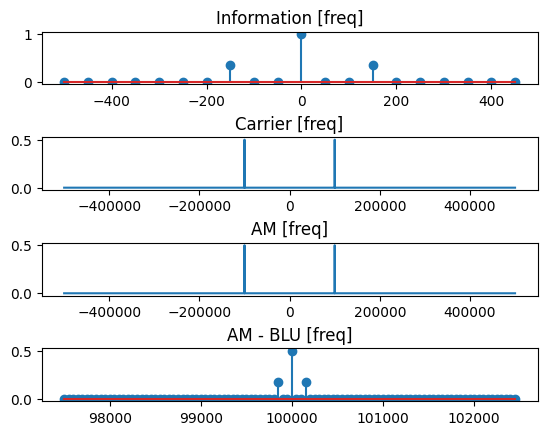

In [54]:
eje_f = np.arange(-Fs1/2, Fs1/2, Fs1/N)
spec_x = fftshift(abs(fft(x)))/N
spec_c = fftshift(abs(fft(c)))/N
spec_am = fftshift(abs(fft(am)))/N

gs2 = plt.GridSpec(4,1)
gs2.update(hspace=1)

ax1_gs2 = plt.subplot(gs2[0])
ax1_gs2.stem(eje_f[int(N/2)-10:int(N/2)+10],spec_x[int(N/2)-10:int(N/2)+10])
ax1_gs2.set_title('Information [freq]')

ax2_gs2 = plt.subplot(gs2[1])
ax2_gs2.plot(eje_f,spec_c)
ax2_gs2.set_title('Carrier [freq]')

ax3_gs2 = plt.subplot(gs2[2])
ax3_gs2.plot(eje_f,spec_am)
ax3_gs2.set_title('AM [freq]')

ax4_gs2 = plt.subplot(gs2[3])
ax4_gs2.stem(eje_f[int(N/2)+1950 : int(N/2) + 2050],spec_am[int(N/2)+1950 : int(N/2) + 2050])
ax4_gs2.set_title('AM - BLU [freq]')

Text(0.5, 1.0, 'Information reconstructed [freq]')

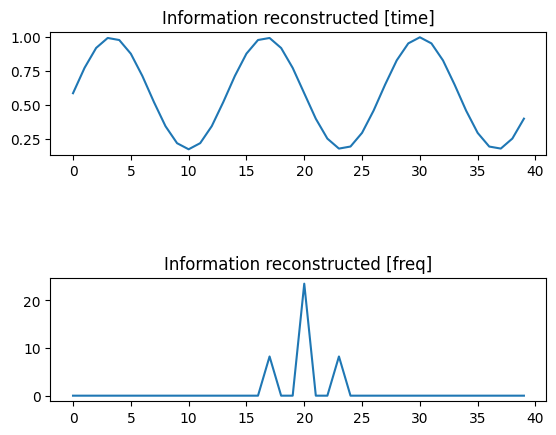

In [55]:
ts = np.arange(1,N,(Fc/200), dtype=int)
sam = np.copy(am[ts])

spec_sam = fftshift(abs(fft(sam)))


gs3 = plt.GridSpec(2,1)
gs3.update(hspace=1)
ax1_gs3 = plt.subplot(gs3[0])
ax1_gs3.plot(sam)
ax1_gs3.set_title('Information reconstructed [time]')
ax2_gs3 = plt.subplot(gs3[1])
ax2_gs3.plot(spec_sam)
ax2_gs3.set_title('Information reconstructed [freq]')

# FILTRADO DIGITAL

## Primera aproximación a un filtro (lineal)
### Media móvil (Moving Average)
$$y[n] = {1 \over {M+N+1}} \sum_{k=-M}^N x[n-k]$$



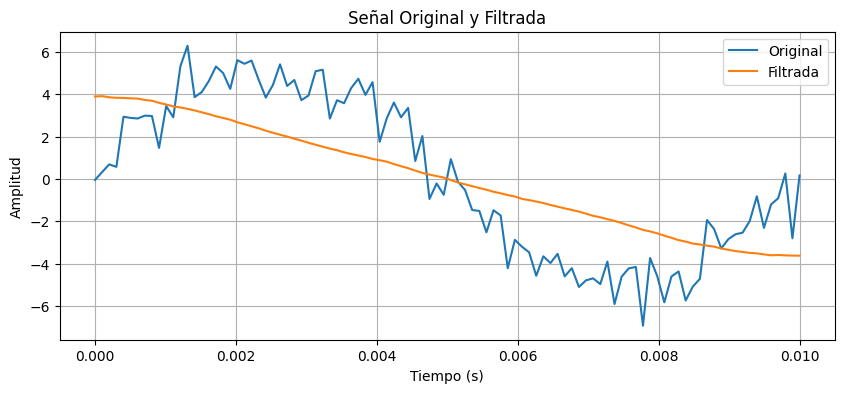

In [56]:
def moving_average(signal, MVSIZE):
  avg = np.zeros(N)
  for n in range(len(signal)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(signal))):
            suma = suma + signal[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
  return avg

Fs = 10000  # Frecuencia de muestreo (Hz)
N = 100      # Número de muestras

t = np.linspace(0,N/Fs,num=N) #Crea una variable de tiempo desde 0, con intervalos de ts=1/Fs
f1 = 100   # Hz
A1 = 5
signal_1 = A1 * np.sin(2*np.pi*f1*t)


ruidosa= signal_1 + np.random.normal(0,1,len(signal_1))
averaged = moving_average(ruidosa, 38)

# Visualizar la señal original y filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, ruidosa, label='Original')
plt.plot(t, averaged, label='Filtrada')
plt.title('Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

## Crear un filtro pasa bajos usando el metodo de Butterworth

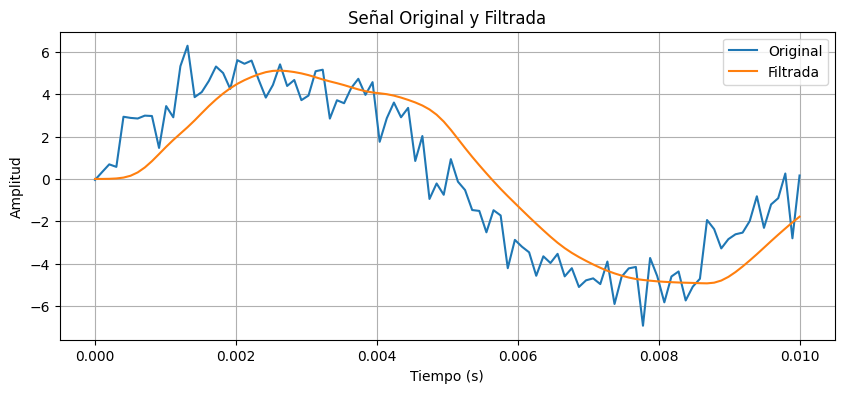

In [57]:

fc = 500  # Frecuencia de corte del filtro
orden = 3  # Orden del filtro
b, a = sig.butter(orden, fc/(0.5*Fs), btype='low', analog=False, output='ba')

# Aplicar el filtro a la señal
senal_filtrada = sig.lfilter(b, a, ruidosa)

# Visualizar la señal original y filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, ruidosa, label='Original')
plt.plot(t, senal_filtrada, label='Filtrada')
plt.title('Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

## Filtros digitales usando Remez-Exchange

Veamos como se calculan distintos tipos de filtros usando este método.

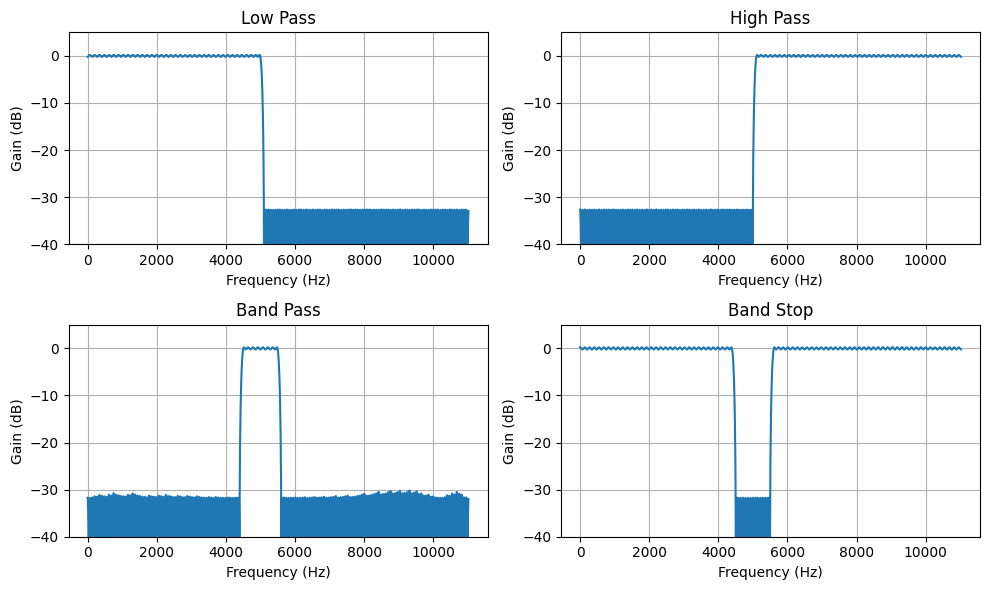

In [58]:
Fs = 22050

def plot_response(ax, w, h, title):
    ax.plot(w, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 5)
    ax.grid(True)
#    ax.set_xlabel('Frequency (Hz)')
#    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)


cutoff = 5000.0    # Frecuencia de corte deseada
trans_width = 100.0  # Ancho de la transición entre bandas de paso y rechazo(Hz)
numtaps = 325      # Numero de coeficientes del filtro
band_width= 1000.0    # Ancho de la banda de paso/rechazo

pasa = [0, cutoff, cutoff + trans_width, 0.5*Fs]

banda = [0, cutoff - band_width/2 - trans_width,
         cutoff - band_width/2, cutoff + band_width/2 ,
         cutoff + band_width/2 + trans_width, 0.5*Fs]

taps = sig.remez(numtaps, pasa, [1,0], fs=Fs)
# calcula los coeficientes del filtro
w, h = sig.freqz(taps, [1], worN=2000, fs=Fs)
# calcula la respuesta en frecuencia del filtro
# y graficamos la misma:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

for ax in axs.flat:
    ax.set(xlabel='Frequency (Hz)', ylabel='Gain (dB)')

# Esconde las marcas del eje x para los gráficos de arriba
# Y las marcas del eje y para los que están a la derecha (sino se superponen)
# for ax in axs.flat:
#     ax.label_outer()

plot_response(axs[0,0], w, h, "Low Pass")

taps = sig.remez(numtaps, pasa, [0,1] , fs=Fs)
w, h = sig.freqz(taps, [1], worN=2000, fs=Fs)
plot_response(axs[0,1], w, h, "High Pass")

taps = sig.remez(numtaps, banda, [0,1,0], fs=Fs)
w, h = sig.freqz(taps, [1], worN=2000, fs=Fs)
plot_response(axs[1,0], w, h, "Band Pass")

taps = sig.remez(numtaps, banda, [1,0,1], fs=Fs)
w, h = sig.freqz(taps, [1], worN=2000, fs=Fs)
plot_response(axs[1,1], w, h, "Band Stop")
plt.tight_layout()
plt.show()

## Diseñar un filtro pasa bajos usando Remez Exchange y aplicarlo a una señal.
Luego, visualizar los resultados

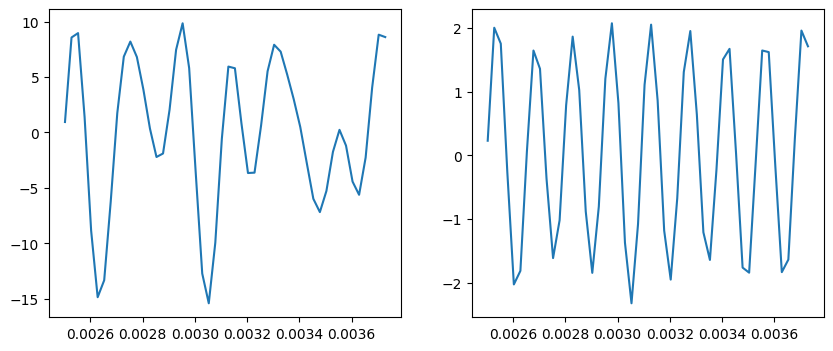

In [59]:
########### Parámetros Iniciales ###########


Fs = 40000  # Frecuencia de muestreo (Hz)
N = 1000      # Número de muestras
t = np.linspace(0,N/Fs,num=N) #Crea una variable de tiempo desde 0, con intervalos de ts=1/Fs

f1 = 2200   # Hz
A1 = 5

f2 = 4800   # Hz
A2 = 4

f3 = 5200   # Hz
A3 = 6

f4 = 6800   # Hz
A4 = 3
# Genero una señal con esas cuatro armonicas.
signal_sum = A1 * np.sin(2*np.pi*f1*t)+ A4 * np.sin(2*np.pi*f4*t) + A2 * np.sin(2*np.pi*f2*t) + A3 * np.sin(2*np.pi*f3*t)

# Parametros iniciales de un low-pass filter
cutoff = 5600.0    # Frecuencia de corte deseada
trans_width = 50.0  # Ancho de la transición entre bandas de paso y rechazo(Hz)
numtaps = 325      # Numero de coeficientes del filtro
band_width= 1000.0    # Ancho de la banda de paso/rechazo

pasa = [0, cutoff, cutoff + trans_width, 0.5*Fs]

# calcula los coeficientes del filtro y su respuesta en frecuencia
taps = sig.remez(numtaps, pasa, [0,1], fs=Fs)
w, h = sig.freqz(taps, [1], worN=1000, fs=Fs)

# Aplicar el filtro usando el metodo filtfilt
filtered = sig.filtfilt(taps,[1],signal_sum)

# Graficar.
fig2, ax2 = plt.subplots(1,2,figsize=(10, 4))

ax2[0].plot(t[100:150],signal_sum[100:150])

ax2[1].plot(t[100:150],filtered[100:150])

#Ejercicio: Aplicar un filtro pasa alto, y pasa banda

# Crear un filtro en el dominio de la frecuencia, usando la FFT.


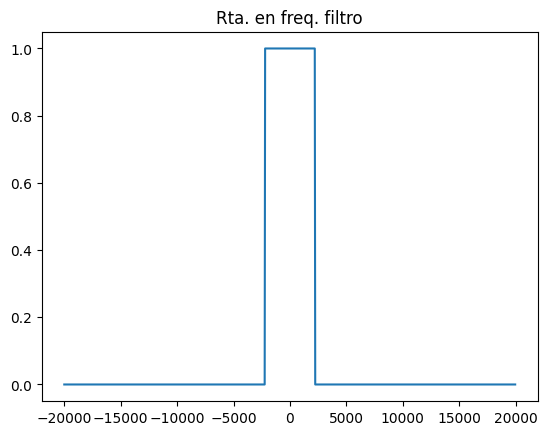

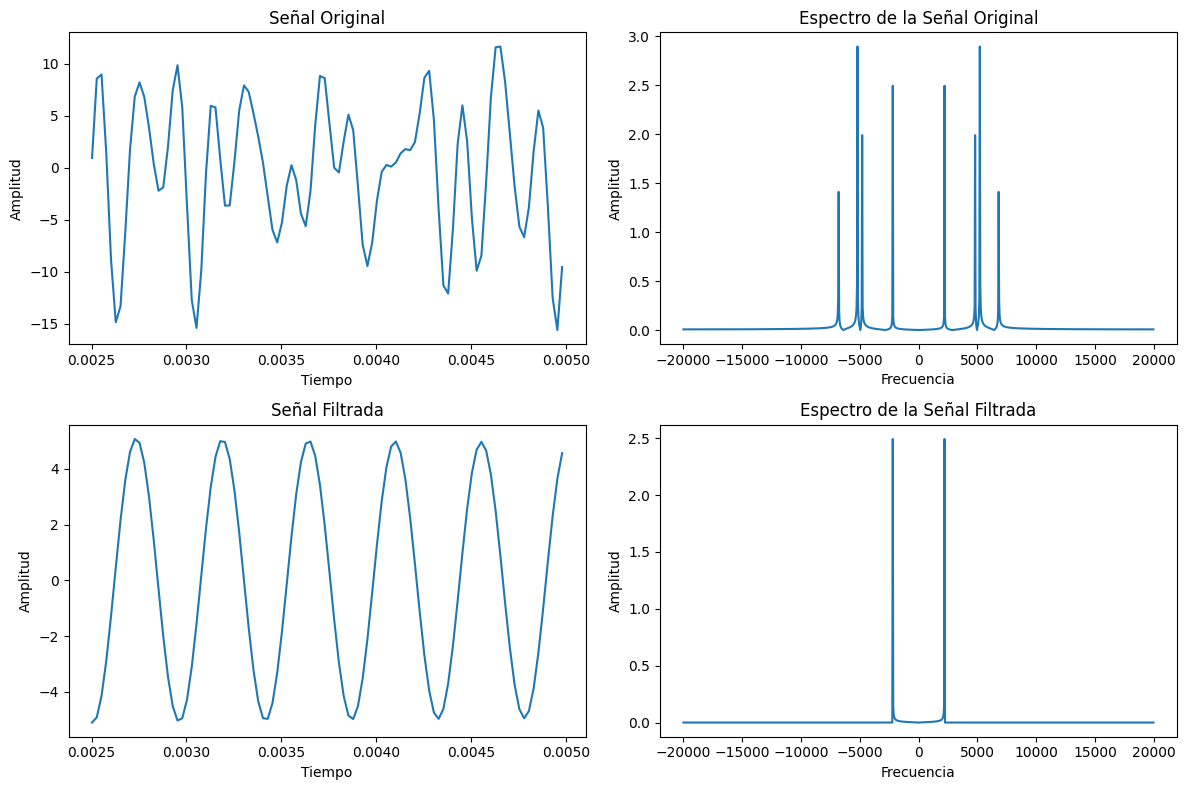

In [60]:
from scipy.fftpack import fft, ifft, fftshift, fftfreq

spec_sig = np.abs(fftshift(fft(signal_sum)))/N

spec_filtered = np.abs(fftshift(fft(filtered)))/N

#creo una base pero de frecuencias, debe estar entre Fs/2 por teorema de Nyquist
freqs = np.linspace(-Fs/2,Fs/2,N)
freqs2 = fftshift(fftfreq(len(t),1/Fs))

# Crear un filtro en el dominio de la frecuencia
filtro = np.ones(len(freqs2))  # Filtro que conserva todas las frecuencias

# Supongamos que queremos eliminar las armónicas de frecuencia f2, f3, y f4
filtro[(freqs2 > f1) | (freqs2 < -f1)] = 0
# Estoy filtrando todas las mayores a f1 (y sus espejos)
plt.plot(freqs2,filtro)
plt.title('Rta. en freq. filtro')
spec_filtrado = spec_sig * filtro

# Calcular la transformada inversa para obtener la señal filtrada en el dominio del tiempo
signal_filtrada = ifft(fftshift(spec_filtrado)) * N

# Visualizar la señal original y la señal filtrada en el dominio del tiempo
plt.figure(figsize=(12, 8))

# Subplot de la señal original en el dominio del tiempo
plt.subplot(2, 2, 1)
plt.plot(t[100:200], signal_sum[100:200])
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Subplot del espectro de la señal original
plt.subplot(2, 2, 2)
plt.plot(freqs2, spec_sig)
plt.title('Espectro de la Señal Original')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

# Subplot de la señal filtrada en el dominio del tiempo
plt.subplot(2, 2, 3)
plt.plot(t[100:200], signal_filtrada.real[100:200])
plt.title('Señal Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Subplot del espectro de la señal filtrada
plt.subplot(2, 2, 4)
plt.plot(freqs2, np.abs(fftshift(fft(signal_filtrada)))/N)
plt.title('Espectro de la Señal Filtrada')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()